In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.tsa as tsa
from statsmodels.tsa.seasonal import seasonal_decompose
import itertools
from tqdm import tqdm_notebook
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot') 

In [3]:
df = pd.read_csv("COMBINED_MP_2000-14.xlsx - Sheet1.csv")

In [4]:
df

,Year,Month,Day,Hour,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed
0,2000,1,1,0,0,0,0,0,0,0,3,13.986429,964.509827,48.661484,175.597127,2.733917
1,2000,1,1,1,0,0,0,0,0,0,3,13.684157,964.110107,50.296294,162.005468,2.660168
2,2000,1,1,2,0,0,0,0,0,0,3,13.329301,963.844177,51.627187,148.352035,2.655523
3,2000,1,1,3,0,0,0,0,0,0,3,13.000682,963.355286,52.655196,134.784919,2.693983
4,2000,1,1,4,0,0,0,0,0,0,3,12.782371,963.358093,54.141549,121.369895,2.719821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,8,17.088166,967.392639,57.127417,116.340806,4.194192
131396,2014,12,31,20,0,0,0,0,0,0,8,16.463739,967.760498,58.422107,129.672867,4.086763
131397,2014,12,31,21,0,0,0,0,0,0,8,15.890945,967.778565,60.172760,143.186428,3.916732
131398,2014,12,31,22,0,0,0,0,0,0,8,15.263030,967.272095,62.580643,156.812191,3.736517


In [5]:
df.dtypes

Year                    int64
Month                   int64
Day                     int64
Hour                    int64
DHI                     int64
DNI                     int64
GHI                     int64
Clearsky DHI            int64
Clearsky DNI            int64
Clearsky GHI            int64
Dew Point               int64
Temperature           float64
Pressure              float64
Relative Humidity     float64
Solar Zenith Angle    float64
Wind Speed            float64
dtype: object

In [6]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
DHI                   0
DNI                   0
GHI                   0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Wind Speed            0
dtype: int64

<AxesSubplot:>

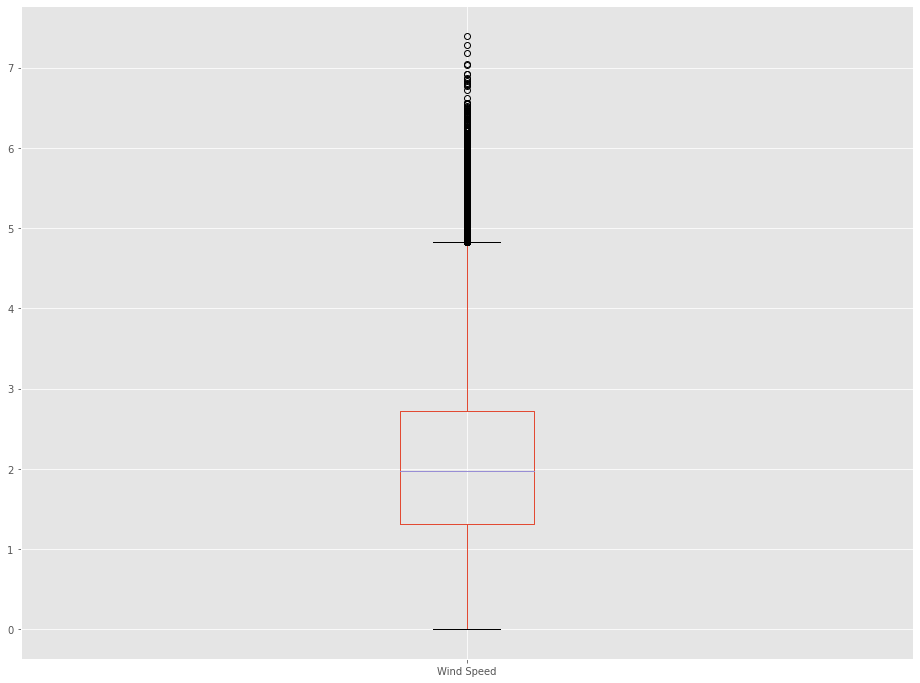

In [7]:
df.boxplot(column=['Wind Speed'])

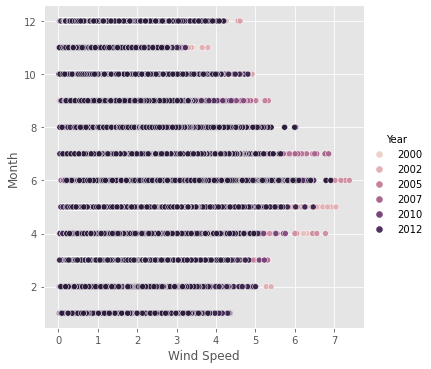

In [8]:
sns.relplot(x="Wind Speed", y="Month",hue='Year', data=df);


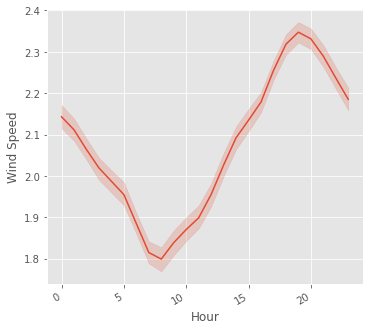

In [9]:
g = sns.relplot(x="Hour", y="Wind Speed", kind="line", data=df)
g.fig.autofmt_xdate()

/home/kshitij/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


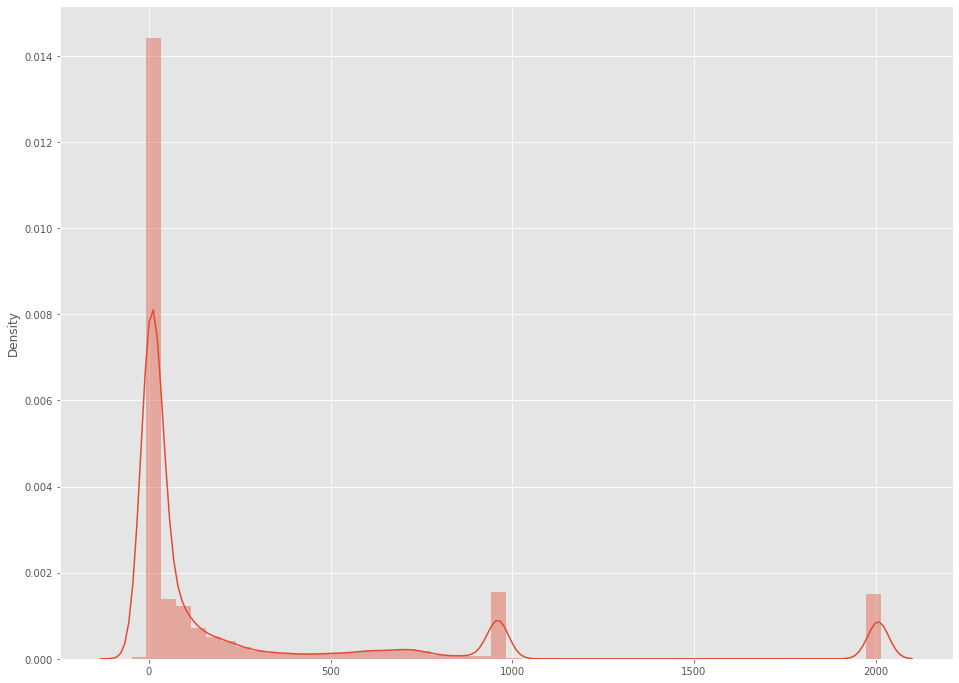

In [10]:
sns.distplot(df);

In [11]:
df_new = df.drop(['Year','Month','Day','Hour'],axis=1)
corr = df_new.corr()
corr.style.background_gradient(cmap='coolwarm')

,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed
DHI,1.000000,0.710772,0.878277,0.952202,0.925200,0.941948,0.047399,0.559404,-0.138935,-0.257673,-0.874258,-0.008644
DNI,0.710772,1.000000,0.933141,0.803306,0.847594,0.812544,-0.170536,0.461156,0.129484,-0.394039,-0.721473,-0.130340
GHI,0.878277,0.933141,1.000000,0.916979,0.922735,0.947481,-0.077991,0.573514,-0.023573,-0.361187,-0.833876,-0.059295
Clearsky DHI,0.952202,0.803306,0.916979,1.000000,0.952336,0.959729,-0.004525,0.604144,-0.109901,-0.322891,-0.901602,-0.017425
Clearsky DNI,0.925200,0.847594,0.922735,0.952336,1.000000,0.966939,-0.010994,0.517005,-0.031210,-0.288742,-0.892520,-0.075619
Clearsky GHI,0.941948,0.812544,0.947481,0.959729,0.966939,1.000000,0.009636,0.579580,-0.111078,-0.291344,-0.890062,-0.022510
Dew Point,0.047399,-0.170536,-0.077991,-0.004525,-0.010994,0.009636,1.000000,0.026137,-0.460148,0.828053,-0.071648,-0.021087
Temperature,0.559404,0.461156,0.573514,0.604144,0.517005,0.579580,0.026137,1.000000,-0.587821,-0.449061,-0.597829,0.255737
Pressure,-0.138935,0.129484,-0.023573,-0.109901,-0.031210,-0.111078,-0.460148,-0.587821,1.000000,-0.143225,0.183563,-0.379218
Relative Humidity,-0.257673,-0.394039,-0.361187,-0.322891,-0.288742,-0.291344,0.828053,-0.449061,-0.143225,1.000000,0.256714,-0.140599


/home/kshitij/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wind Speed', ylabel='Density'>

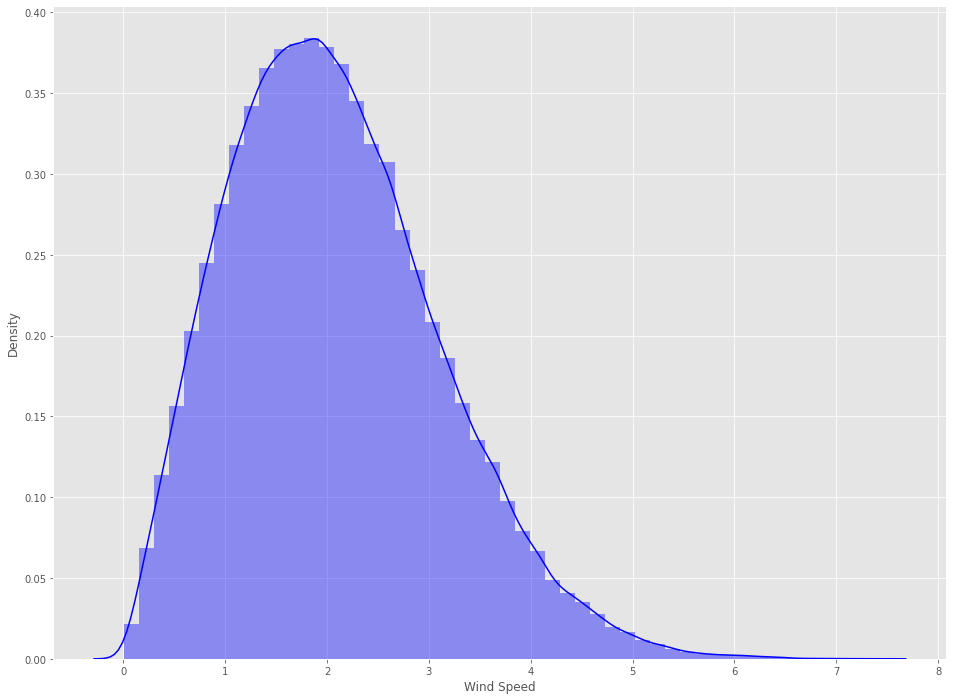

In [12]:
sns.distplot(df['Wind Speed'], color='b')


In [13]:
# df=df.astype('int')
df=df.assign(datetime_val=[f"{str(year)}{str(month)}{str(day)}" for year, month, day in zip(df['Year'], df['Month'], df['Day'])])
df

,Year,Month,Day,Hour,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed,datetime_val
0,2000,1,1,0,0,0,0,0,0,0,3,13.986429,964.509827,48.661484,175.597127,2.733917,200011
1,2000,1,1,1,0,0,0,0,0,0,3,13.684157,964.110107,50.296294,162.005468,2.660168,200011
2,2000,1,1,2,0,0,0,0,0,0,3,13.329301,963.844177,51.627187,148.352035,2.655523,200011
3,2000,1,1,3,0,0,0,0,0,0,3,13.000682,963.355286,52.655196,134.784919,2.693983,200011
4,2000,1,1,4,0,0,0,0,0,0,3,12.782371,963.358093,54.141549,121.369895,2.719821,200011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,8,17.088166,967.392639,57.127417,116.340806,4.194192,20141231
131396,2014,12,31,20,0,0,0,0,0,0,8,16.463739,967.760498,58.422107,129.672867,4.086763,20141231
131397,2014,12,31,21,0,0,0,0,0,0,8,15.890945,967.778565,60.172760,143.186428,3.916732,20141231
131398,2014,12,31,22,0,0,0,0,0,0,8,15.263030,967.272095,62.580643,156.812191,3.736517,20141231


In [14]:
first_column = df.pop('datetime_val')
  
df.insert(0, 'datetime_val', first_column)

In [15]:
df['datetime_val'] = pd.to_datetime(df['datetime_val'], format='%Y%m%d')
df_time = df.set_index('datetime_val')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   datetime_val        131400 non-null  datetime64[ns]
 1   Year                131400 non-null  int64         
 2   Month               131400 non-null  int64         
 3   Day                 131400 non-null  int64         
 4   Hour                131400 non-null  int64         
 5   DHI                 131400 non-null  int64         
 6   DNI                 131400 non-null  int64         
 7   GHI                 131400 non-null  int64         
 8   Clearsky DHI        131400 non-null  int64         
 9   Clearsky DNI        131400 non-null  int64         
 10  Clearsky GHI        131400 non-null  int64         
 11  Dew Point           131400 non-null  int64         
 12  Temperature         131400 non-null  float64       
 13  Pressure            131400 no

In [17]:
df_day = df_time.resample('D').agg({'Wind Speed':'max'})
df_day = df_day.replace({'Wind Speed':{0:np.median(df_day['Wind Speed'])}})

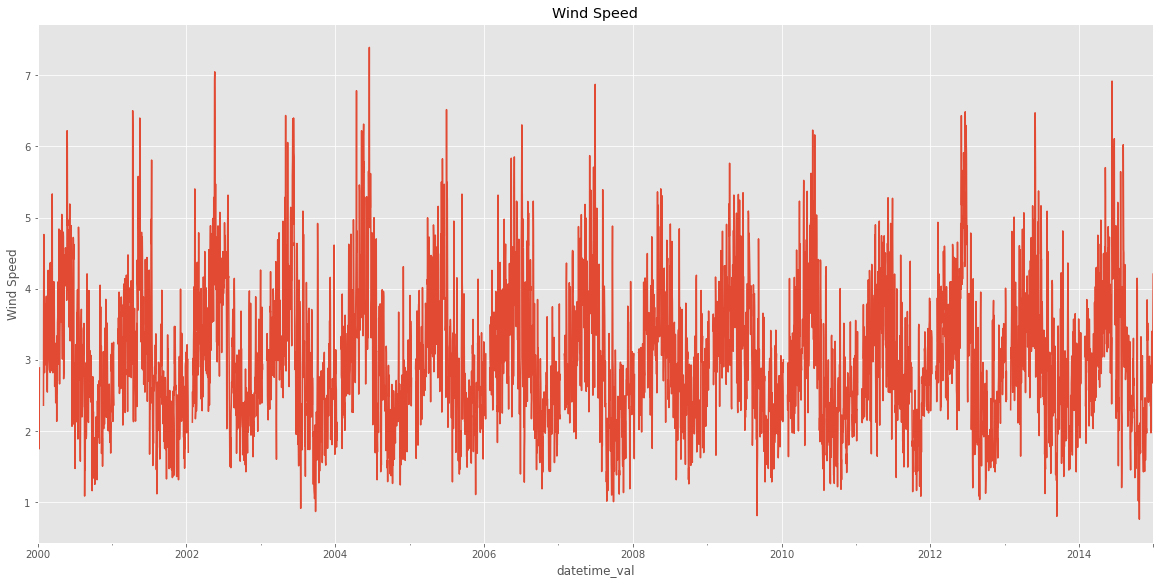

In [25]:
f, (ax1) = plt.subplots(1,1, figsize=(16,8), constrained_layout=True)

df_day['Wind Speed'].plot(ax=ax1);
ax1.set_ylabel('Wind Speed');
ax1.set_title('Wind Speed');
